## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

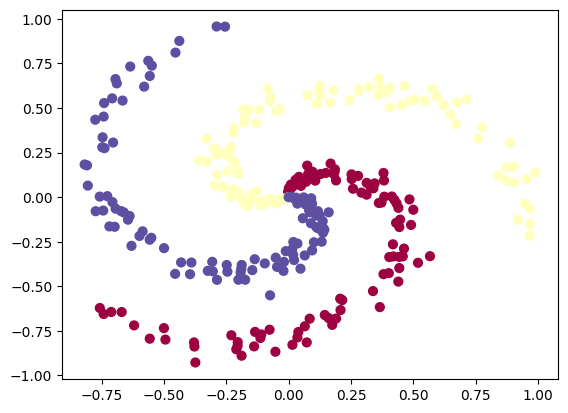

In [20]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# Data Visualization to check for non-linearity:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

In [59]:
def compute_scores(X, W, b):
    scores = np.dot(X, W) + b
    return scores

# Example usage:
D = X.shape[1] # dimensionality of input data
K = len(np.unique(y)) # number of classes
W = 0.01 * np.random.randn(D, K)
b = np.zeros(K,)

# Compute the scores
scores = compute_scores(X, W, b)
print("Scores shape:", scores.shape)

Scores shape: (300, 3)


### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [66]:
# SVM classifier Final
def L1_i (x_i , y_i , W, b):
    delta = 1.0
    f = W.T.dot(x_i) + b
    margins = np. maximum (0, f - f[y_i ] + delta )
    margins [y_i ] = 0 # ignore true class
    return np. sum( margins )

# Softmax classifier Final
def L2_i (x_i , y_i , W, b):
    f = W.T.dot(x_i) + b
    f -= np.max(f) # avoid potential blowup
    p = np.exp(f) / np.sum(np.exp(f))
    return -np. log(p[ y_i ])


### Task 3: Regularization
Add L2 regularization to your loss function.

In [63]:
# SVM Classifier
def svm_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L1_i(X[i], y[i], W, b)
    loss /= N
    # Add L2 regularization
    loss += reg_lambda * np.sum(W * W)
    return loss

# Softmax Classifier
def softmax_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L2_i(X[i], y[i], W, b)
    loss /= N
    # Add L2 regularization
    loss += reg_lambda * np.sum(W * W)
    return loss

### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

In [68]:
import numpy as np
def num_grad (f,x): # finite difference method
    fx = f(x)
    grad = np.zeros(x.shape)
    h = 0.00001
    it = np.nditer(x,flags =['multi_index'],
        op_flags =['readwrite'])
    while not it.finished:
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h
        fxh = f(x)
        x[ix] = old_value
        grad [ix] = (fxh - fx)/h
        it.iternext()
    return grad

In [69]:
svm_loss_value = svm_loss(X, y, W, b)
print("SVM Loss:", svm_loss_value)

softmax_loss_value = softmax_loss(X, y, W, b)
print("Softmax Loss:", softmax_loss_value)

SVM Loss: 1.997042089440211
Softmax Loss: 1.097643146638078


### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
